# The Boston Housing Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

Translate into Vietnamese

- CRIM - tỷ lệ tội phạm bình quân đầu người theo thị trấn
- ZN - tỷ lệ đất ở được phân lô trên 25,000 ft²
- INDUS - tỷ lệ diện tích đất kinh doanh phi bán lẻ theo thị trấn
- CHAS - biến giả sông Charles (1 nếu khu vực giáp sông; 0 nếu không giáp sông)
- NOX - nồng độ oxit nitric (phần triệu)
- RM - số phòng trung bình mỗi căn nhà
- AGE - tỷ lệ nhà ở chủ sở hữu được xây dựng trước năm 1940
- DIS - khoảng cách trung bình đến năm trung tâm việc làm của Boston
- RAD - chỉ số tiếp cận đến đường cao tốc hướng tâm
- TAX - tỷ lệ thuế tài sản theo giá trị thực tế mỗi $10,000
- PTRATIO - tỷ lệ học sinh-giáo viên theo thị trấn
- B - 1000(Bk - 0.63)^2 trong đó Bk là tỷ lệ người da đen theo thị trấn
- LSTAT - % dân số thuộc tầng lớp thấp
- MEDV - Giá trị trung bình của nhà ở chủ sở hữu tính theo $1000

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Solving Problems

#### Problem 1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

Text(0.5, 1.0, 'Median Value of Houses Bounded by the Charles River')

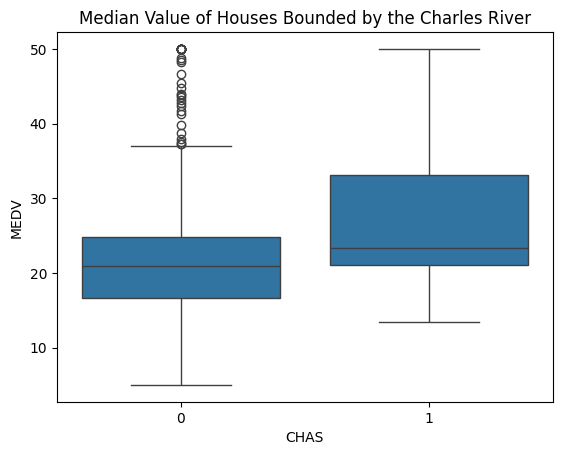

In [4]:
sns.boxplot(x='CHAS', y='MEDV', data=boston_df).set_title('Median Value of Houses Bounded by the Charles River')

State the problem : Is there a significant difference in the median value of houses bounded by the Charles river or not?

**Null Hypothesis ($H_0$):**

$H_0: \mu_1 = \mu_2$

There is no significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.

**Alternative Hypothesis ($H_1$):**

$H_1: \mu_1 \neq \mu_2$

There is a significant difference in the median value of houses bounded by the Charles River and those not bounded by the river.


Caculate the T-statistic and P-value

In [5]:
# Separate the data into two groups based on the CHAS variable
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent t-test
t_stat, p_value = scipy.stats.ttest_ind(bounded_by_river, not_bounded_by_river)


# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


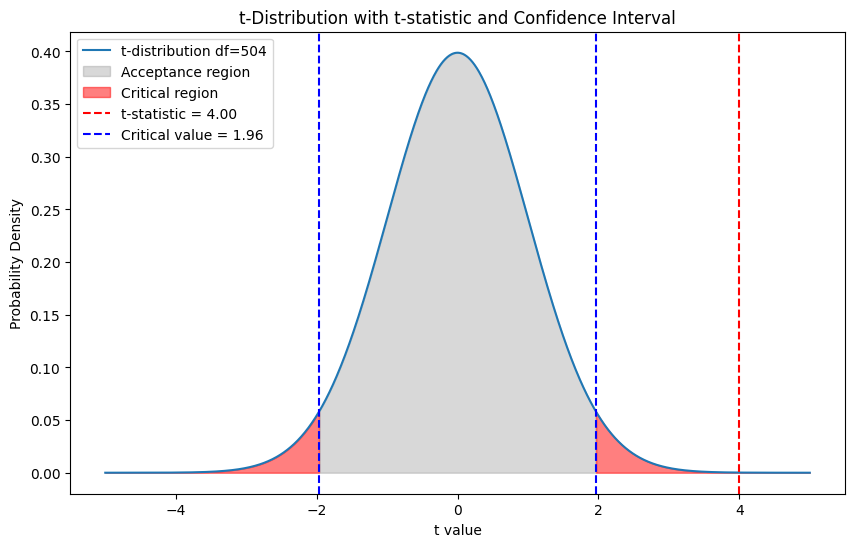

In [6]:
df = len(bounded_by_river) + len(not_bounded_by_river) - 2  # degrees of freedom
alpha = 0.05  # significance level for a 95% confidence interval

# Create an array of x values for the t-distribution
x = np.linspace(-5, 5, 1000)

# Calculate the t-distribution for the given degrees of freedom
y = scipy.stats.t.pdf(x, df)

# Critical t-value for a two-tailed test at 95% confidence level
critical_value = scipy.stats.t.ppf(1 - alpha/2, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution df={}'.format(df))

# Fill the acceptance region (within the critical values)
plt.fill_between(x, y, where=(x <= critical_value) & (x >= -critical_value), color='grey', alpha=0.3, label='Acceptance region')

# Highlight the t-statistic
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label='Critical region')
plt.fill_between(x, y, where=(x <= -critical_value), color='red', alpha=0.5)
plt.axvline(x=t_stat, color='red', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))

# Add critical value lines
plt.axvline(x=critical_value, color='blue', linestyle='--', label='Critical value = {:.2f}'.format(critical_value))
plt.axvline(x=-critical_value, color='blue', linestyle='--')

plt.title('t-Distribution with t-statistic and Confidence Interval')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

Based on the calculated t-statistic of 4.00, which falls outside the acceptance region of the 95% confidence interval (-1.96 to 1.96), we reject the null hypothesis (H0). This indicates that there is a significant difference in the median value of houses bounded by the Charles river compared to those not bounded by the river, with a 95% confidence level.

In other words, we can conclude with 95% confidence that there is a statistically significant difference in the median values of houses based on their proximity to the Charles river.

#### Problem 2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?


C:\Users\admin\AppData\Local\Temp\ipykernel_22220\3514237106.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '35 years and younger' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'


[Text(0, 0.5, 'Median Value of Houses'), Text(0.5, 0, 'Age of Homes')]

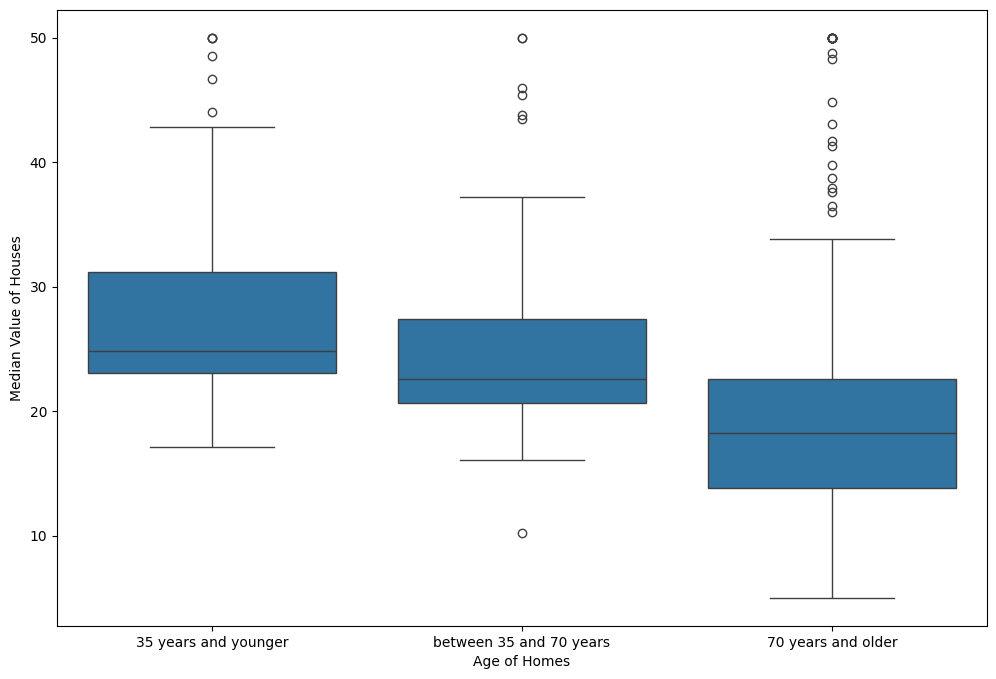

In [8]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', order=['35 years and younger', 'between 35 and 70 years', '70 years and older'], data=boston_df)
ax.set(ylabel='Median Value of Houses', xlabel='Age of Homes')

State the hypothesis:

**Null Hypothesis ($H_0$):**

$H_0: \mu_1 = \mu_2 = \mu_3$

There is no difference in means of median values of houses for each proportion of owner occupied units built prior to 1940.

**Alternative Hypothesis ($H_1$):**

$H_1: \mu_i \neq \mu_j$ for at least one pair $(i, j)$

There is difference in means median values of houses for at least one pair of different proportions of owner-occupied units built prior to 1940.

Use ANOVA to test 

In [11]:
f_statistic, p_value= scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'], 
                    boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                    boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'])

print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15




Since the p-value is significantly lower than the significance level of 0.05 (with 95% confidence level), we reject the null hypothesis $H_0$. This indicates that there is a statistically significant difference in the mean (or median) values of houses among the different categories of the proportion of owner-occupied units built prior to 1940.



#### Problem 3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

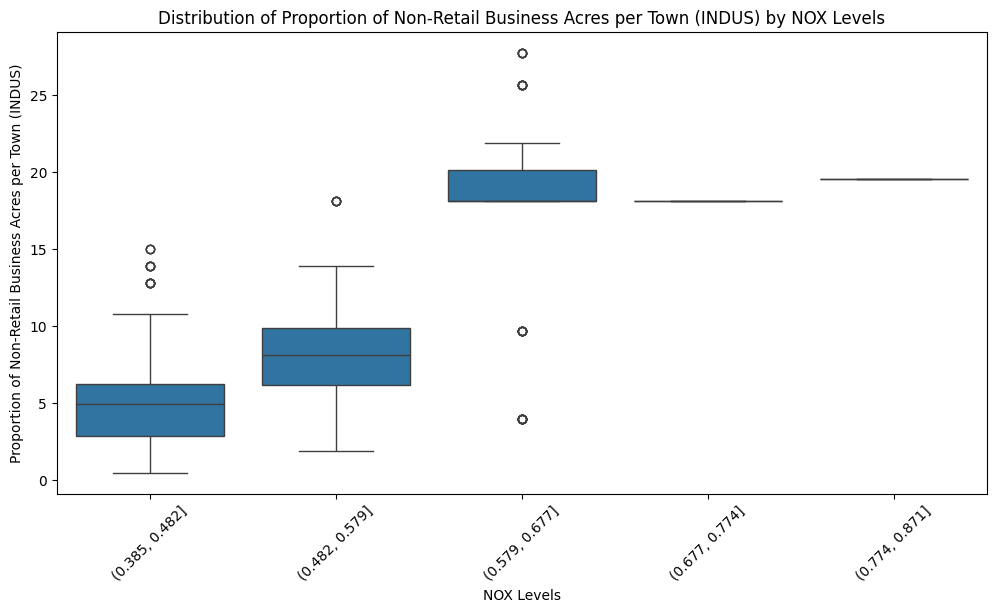

Pearson correlation coefficient: 0.7636514469209157
P-value: 7.91336106123623e-98
There is a statistically significant relationship between NOX and INDUS.


In [15]:
# Create a box plot to visualize the distribution of INDUS for different levels of NOX
# For the sake of visualization, let's categorize NOX into bins
boston_df['NOX_category'] = pd.cut(boston_df['NOX'], bins=5)

plt.figure(figsize=(12, 6))
sns.boxplot(x='NOX_category', y='INDUS', data=boston_df)
plt.title('Distribution of Proportion of Non-Retail Business Acres per Town (INDUS) by NOX Levels')
plt.xlabel('NOX Levels')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.xticks(rotation=45)
plt.show()


# Calculate Pearson correlation coefficient and p-value
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Pearson correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant relationship between NOX and INDUS.")
else:
    print("There is no statistically significant relationship between NOX and INDUS.")

#### Problem 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Slope: 1.0916130158411095
Intercept: 18.390088330493384
R-squared: 0.06246437212178249
P-value: 1.2066117273371046e-08
Standard error: 0.18837841478683098


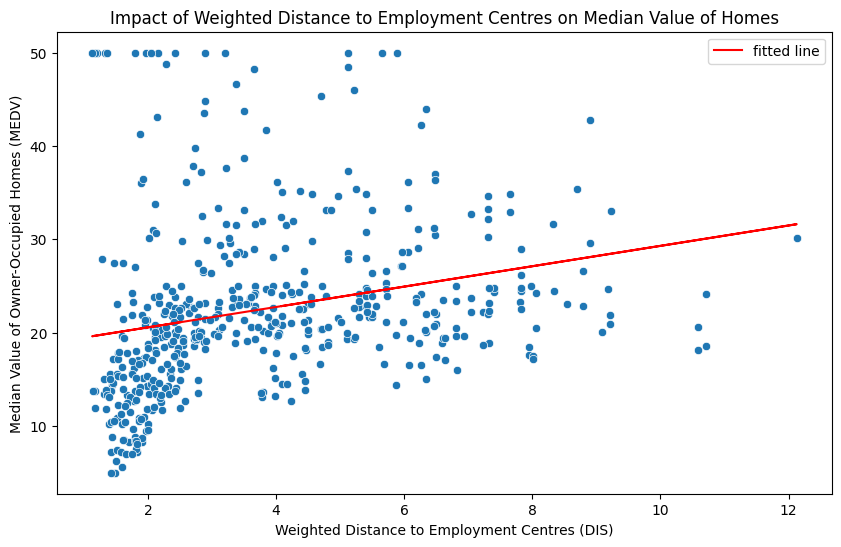

In [17]:
# Chuẩn bị dữ liệu cho hồi quy
X = boston_df['DIS']  # khoảng cách trọng số tới 5 trung tâm việc làm
y = boston_df['MEDV']  # giá trị trung bình của các ngôi nhà

# Thực hiện hồi quy tuyến tính
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, y)

# In ra kết quả
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R-squared: {r_value**2}')
print(f'P-value: {p_value}')
print(f'Standard error: {std_err}')

# Vẽ biểu đồ với đường hồi quy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
plt.plot(X, intercept + slope * X, 'r', label='fitted line')
plt.title('Impact of Weighted Distance to Employment Centres on Median Value of Homes')
plt.xlabel('Weighted Distance to Employment Centres (DIS)')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.legend()
plt.show()


Conclusion: There appears to be a slight positive relationship between the weighted distance to employment centres and the median value of owner-occupied homes. This is indicated by the upward slope of the fitted line.

As the weighted distance to employment centres increases, the median value of owner-occupied homes tends to increase slightly. This suggests that homes located further from employment centres may have slightly higher median values.

The scatter plot shows a lot of dispersion around the fitted line, indicating that the relationship is weak and other factors are likely to be more influential in determining the median value of homes.

In summary, while there is a positive impact of an additional weighted distance to the employment centres on the median value of owner-occupied homes, this impact is relatively weak and there is significant variability in home values that cannot be explained by distance alone.

#### Problem 5: What are the most significant property attributes that affect house prices?

<Axes: >

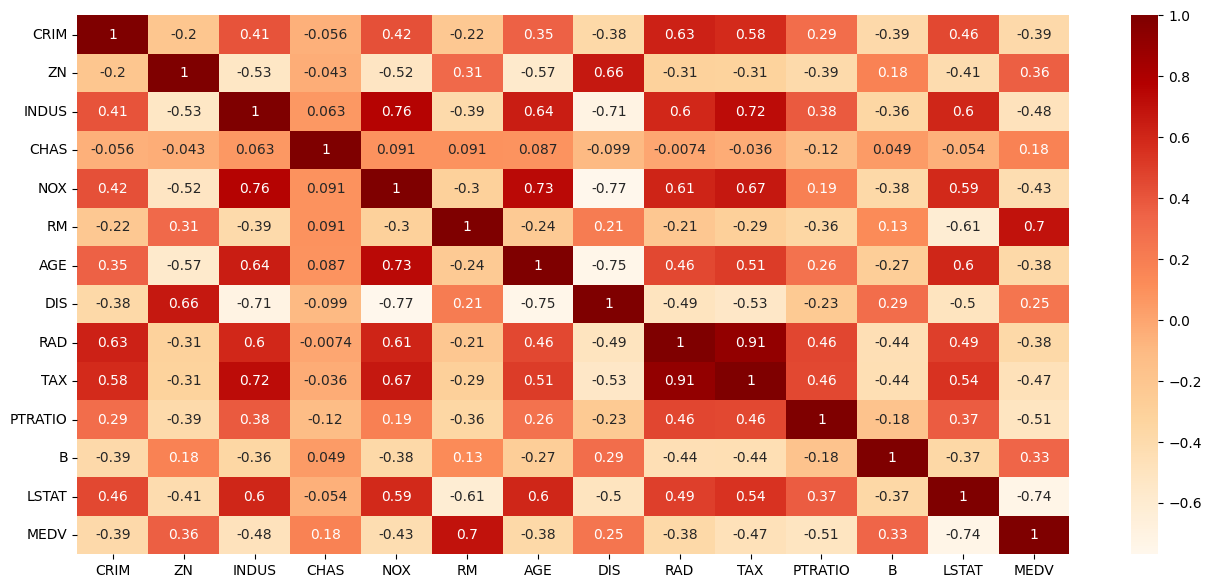

In [25]:
plt.figure(figsize=(16,7))
sns.heatmap(boston_df.corr(), annot=True, cmap='OrRd')

In [5]:
boston_df.corr()['MEDV'].apply(abs).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [30]:
boston_df.corr()['MEDV']['PTRATIO']

-0.5077866855375623

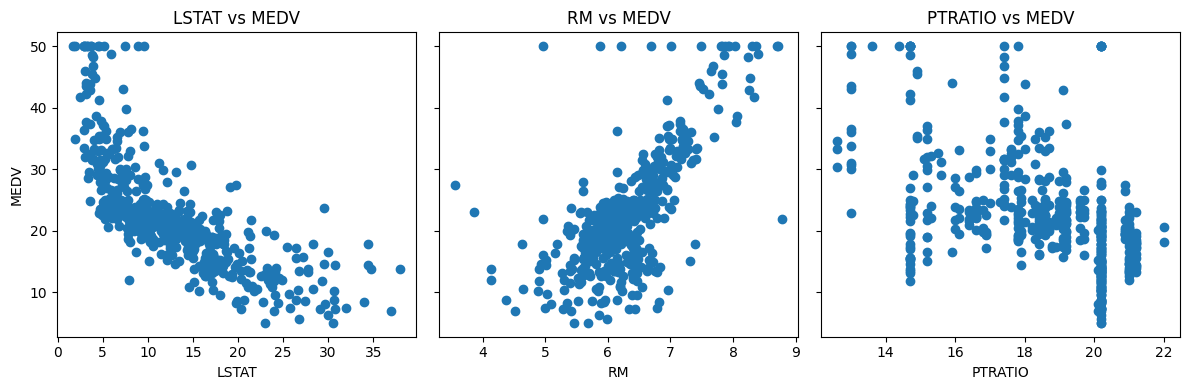

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

ax1.scatter(boston_df['LSTAT'], boston_df['MEDV'])
ax1.set_xlabel('LSTAT')
ax1.set_ylabel('MEDV')
ax1.set_title('LSTAT vs MEDV')

ax2.scatter(boston_df['RM'], boston_df['MEDV'])
ax2.set_xlabel('RM')
ax2.set_title('RM vs MEDV')

ax3.scatter(boston_df['PTRATIO'], boston_df['MEDV'])
ax3.set_xlabel('PTRATIO')
ax3.set_title('PTRATIO vs MEDV')

plt.tight_layout()
plt.show()

**Finding:** 
- LSTAT and target seem to have a negative non-linear relationship. This is expected as LSTAT is the percent of lower status people (lower status, lower incomes, cheaper houses) 
- RM and MEDV seem to have a positive non-linear relationship. This is expected as RM is the number of rooms (more space, higher price)
- PTRATIO and MEDV seem to have a negative non-linear relationship. This is expected as PTRATIO is the pupil-teacher ratio by town (quality of education)

#### Problem 6: Building model to predict Median Home Value from the dataset in the dataframe

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [9]:
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [11]:
result = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    result[name] = {'mse': mse, 'r2': r2}


In [12]:
pd.DataFrame(result)

,Linear Regression,Decision Tree,Random Forest
mse,23.380836,19.313235,8.039164
r2,0.763417,0.804576,0.918654


We can see that Random Forest give better mse and r2 so we will use it to create the model

In [13]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score on Test Set:", r2)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best R2 Score: 0.8718893581996369
R2 Score on Test Set: 0.9183463890646425


Test model

In [14]:
boston_min_max = pd.concat([boston_df.min(), boston_df.max()], axis=1)
boston_min_max.columns = ['Min', 'Max']
boston_min_max

,Min,Max
CRIM,0.00632,88.9762
ZN,0.00000,100.0000
INDUS,0.46000,27.7400
CHAS,0.00000,1.0000
NOX,0.38500,0.8710
RM,3.56100,8.7800
AGE,2.90000,100.0000
DIS,1.12960,12.1265
RAD,1.00000,24.0000
TAX,187.00000,711.0000


In [41]:
new_data= [[20, 30, 19, 0, 0.45, 6.4, 60, 6, 12, 300, 18, 290, 20]]
predicted_value = best_model.predict(new_data)
print(new_data)
print(np.round(predicted_value, 2))

[[20, 30, 19, 0, 0.45, 6.4, 60, 6, 12, 300, 18, 290, 20]]
[16.72]


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
columns = boston_df.columns.tolist()
columns.remove('MEDV')
new_df = pd.DataFrame(new_data, columns=columns)
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,20,30,19,0,0.45,6.4,60,6,12,300,18,290,20


In [49]:
predicted_columns = ['MEDV']
result_df = pd.DataFrame(predicted_value, predicted_columns)
result_df

,0
MEDV,16.722146


Saving model

In [16]:
# with open('model.pkl', 'wb') as file:
#     pickle.dump(grid_search, file)